# 상품 "몰스킨" 검색

> 상품 “몰스킨” 검색하고 쇼핑 정보를 취득하는 과정을 차례대로 함수화한다.

In [1]:
import os
import sys
import urllib.request

client_id = "LGEjycuWmA1fDTIGyyam"
client_secret = "3ie0bSi2z_"

encText = urllib.parse.quote("몰스킨")
url = "https://openapi.naver.com/v1/search/shop?query=" + encText # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)

response = urllib.request.urlopen(request)
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
	"lastBuildDate":"Tue, 16 Jan 2024 07:16:30 +0900",
	"total":52009,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"<b>몰스킨<\/b> 2024 다이어리 클래식 하드커버 위클리 라지 2024년 24년",
			"link":"https:\/\/search.shopping.naver.com\/gate.nhn?id=86678091959",
			"image":"https:\/\/shopping-phinf.pstatic.net\/main_8667809\/86678091959.3.jpg",
			"lprice":"31080",
			"hprice":"",
			"mallName":"베스트펜",
			"productId":"86678091959",
			"productType":"2",
			"brand":"몰스킨",
			"maker":"몰스킨",
			"category1":"생활\/건강",
			"category2":"문구\/사무용품",
			"category3":"다이어리\/플래너",
			"category4":"다이어리"
		},
		{
			"title":"[<b>몰스킨<\/b>] 2024년 클래식 다이어리 (12개월) (데일리, 위클리, 먼슬리)",
			"link":"https:\/\/search.shopping.naver.com\/gate.nhn?id=42344941884",
			"image":"https:\/\/shopping-phinf.pstatic.net\/main_4234494\/42344941884.jpg",
			"lprice":"22680",
			"hprice":"",
			"mallName":"몰스킨공식온라인스토어",
			"productId":"42344941884",
			"productType":"2",
			"brand":"몰스킨",
			"maker":"",
			"category1":"생활\/건강",
			"category

- 함수화 과정 플랜

![06_molskin_plan](https://github.com/ElaYJ/Study_EDA/assets/153154981/f51f10fb-65dd-418c-9b3a-3d9a00dbdfc2)

### 🔰 get_search_url()

> 검색 요청 url을 만드는 함수

- 참고: https://developers.naver.com/docs/serviceapi/search/shopping/shopping.md#%EC%87%BC%ED%95%91

- 파라미터(요청 변수)들을 url에 포함해야 한다.
	![06_molskin_plan-1-1](https://github.com/ElaYJ/Study_EDA/assets/153154981/3ad43e11-eece-4fc4-9ff1-dc22adc2861f)

- 한 번에 표시될 수 있는 검색 결과(display)의 최대값은 100개이다.
- 만약 우리가 1000개의 데이터를 얻고 싶다면, start 파라미터를 이용한다.

	첫 번째 턴에서는 display = 100, start = 1, 두 번째 턴에서는 display = 100, start = 101 이런 형식으로...

- 기본 예제에서 사용했던 url을 만드는 함수를 정의 한다.

	encText = urllib.parse.quote("몰스킨")</br>	
	url = "https://openapi.naver.com/v1/search/shop?query=" + encText # json 결과

In [13]:
import urllib

def gen_search_url(api_node, search_text, start_num, disp_num):
    """
    - api_node : 쇼핑, 블로그, 카페 등 어디에서 검색할 것인지
    - search_text : 검색어
    - start_num : 검색 시작 위치
    - disp_num : 한 번에 표시할 검색 결과 개수
    """
    base = "https://openapi.naver.com/v1/search"
    node = "/" + api_node + ".json"
    param_query = "?query=" + urllib.parse.quote(search_text)
    param_start = "&start=" + str(start_num)
    param_disp = "&display=" + str(disp_num)
    
    return base + node + param_query + param_start + param_disp

In [3]:
gen_search_url("shop", "Test", 10, 3)

'https://openapi.naver.com/v1/search/shop.json?query=Test&start=10&display=3'

### 🔰 get_result_onepage()

> url로 웹에 접근해 내용을 json으로 가져와 Decode 해주는 함수

- 기본 예제 코드에서 다음 부분을 함수화 한 것~!

	request = urllib.request.Request(url)

	request.add_header("X-Naver-Client-Id",client_id)

	request.add_header("X-Naver-Client-Secret",client_secret)
	
	response = urllib.request.urlopen(request)

In [4]:
import json
import datetime
from urllib.request import Request, urlopen

def get_result_onepage(url):
    client_id = "LGEjycuWmA1fDTIGyyam"
    client_secret = "3ie0bSi2z_"

    request = Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    
    response = urlopen(request)
    print("[%s] URL Request Success" % datetime.datetime.now())
    return json.loads(response.read().decode("utf-8"))

In [5]:
datetime.datetime.now()

datetime.datetime(2024, 1, 16, 7, 38, 49, 925403)

In [6]:
url = gen_search_url("shop", "몰스킨", 1, 5)
one_result = get_result_onepage(url)

[2024-01-16 07:40:02.174472] URL Request Success


In [7]:
one_result #--> 리스트 형태

{'lastBuildDate': 'Tue, 16 Jan 2024 07:40:02 +0900',
 'total': 52011,
 'start': 1,
 'display': 5,
 'items': [{'title': '<b>몰스킨</b> 2024 다이어리 클래식 하드커버 위클리 라지 2024년 24년',
   'link': 'https://search.shopping.naver.com/gate.nhn?id=86678091959',
   'image': 'https://shopping-phinf.pstatic.net/main_8667809/86678091959.3.jpg',
   'lprice': '31080',
   'hprice': '',
   'mallName': '베스트펜',
   'productId': '86678091959',
   'productType': '2',
   'brand': '몰스킨',
   'maker': '몰스킨',
   'category1': '생활/건강',
   'category2': '문구/사무용품',
   'category3': '다이어리/플래너',
   'category4': '다이어리'},
  {'title': '[<b>몰스킨</b>] 2024년 클래식 다이어리 (12개월) (데일리, 위클리, 먼슬리)',
   'link': 'https://search.shopping.naver.com/gate.nhn?id=42344941884',
   'image': 'https://shopping-phinf.pstatic.net/main_4234494/42344941884.jpg',
   'lprice': '22680',
   'hprice': '',
   'mallName': '몰스킨공식온라인스토어',
   'productId': '42344941884',
   'productType': '2',
   'brand': '몰스킨',
   'maker': '',
   'category1': '생활/건강',
   'category2': '문구

In [48]:
one_result["items"][0]

{'title': '<b>몰스킨</b> 2024 다이어리 클래식 하드커버 위클리 라지 2024년 24년',
 'link': 'https://search.shopping.naver.com/gate.nhn?id=86678091959',
 'image': 'https://shopping-phinf.pstatic.net/main_8667809/86678091959.3.jpg',
 'lprice': '31080',
 'hprice': '',
 'mallName': '베스트펜',
 'productId': '86678091959',
 'productType': '2',
 'brand': '몰스킨',
 'maker': '몰스킨',
 'category1': '생활/건강',
 'category2': '문구/사무용품',
 'category3': '다이어리/플래너',
 'category4': '다이어리'}

In [8]:
one_result["items"][0]["title"]

'<b>몰스킨</b> 2024 다이어리 클래식 하드커버 위클리 라지 2024년 24년'

In [9]:
one_result["items"][0]["link"]

'https://search.shopping.naver.com/gate.nhn?id=86678091959'

In [10]:
one_result["items"][0]["lprice"]

'31080'

In [11]:
one_result["items"][0]["mallName"]

'베스트펜'

### 🔰 get_fields()

> 검색 정보를 DataFrame으로 만드는 함수

In [12]:
one_result["items"][0]

{'title': '<b>몰스킨</b> 2024 다이어리 클래식 하드커버 위클리 라지 2024년 24년',
 'link': 'https://search.shopping.naver.com/gate.nhn?id=86678091959',
 'image': 'https://shopping-phinf.pstatic.net/main_8667809/86678091959.3.jpg',
 'lprice': '31080',
 'hprice': '',
 'mallName': '베스트펜',
 'productId': '86678091959',
 'productType': '2',
 'brand': '몰스킨',
 'maker': '몰스킨',
 'category1': '생활/건강',
 'category2': '문구/사무용품',
 'category3': '다이어리/플래너',
 'category4': '다이어리'}

In [14]:
import pandas as pd

def get_fields(json_data):
    title = [each["title"] for each in json_data["items"]]
    link = [each["link"] for each in json_data["items"]]
    lprice = [each["lprice"] for each in json_data["items"]]
    mall_name = [each["mallName"] for each in json_data["items"]]

    result_df = pd.DataFrame({
        "title": title,
        "lprice": lprice,
        "link": link,
        "mall": mall_name,
    }) #, columns=["title", "lprice", "link", "mall"]
    return result_df

In [15]:
get_fields(one_result)

,title,lprice,link,mall
0,<b>몰스킨</b> 2024 다이어리 클래식 하드커버 위클리 라지 2024년 24년,31080,https://search.shopping.naver.com/gate.nhn?id=...,베스트펜
1,"[<b>몰스킨</b>] 2024년 클래식 다이어리 (12개월) (데일리, 위클리, ...",22680,https://search.shopping.naver.com/gate.nhn?id=...,몰스킨공식온라인스토어
2,<b>몰스킨</b> 2024 다이어리 클래식 소프트커버 데일리 라지 2024년 24년,32760,https://search.shopping.naver.com/gate.nhn?id=...,베스트펜
3,<b>몰스킨</b> 2024 위클리 다이어리 포켓 상품선택,25680,https://search.shopping.naver.com/gate.nhn?id=...,네이버
4,스타벅스 2024년 <b>몰스킨</b> 다이어리 데일리 플래너 일기장 노트 스벅 카...,29400,https://search.shopping.naver.com/gate.nhn?id=...,유니스스토어


### 🔰 delete_tag()

> 제목에 강조를 위해 붙은 \<b>태그를 제거하는 함수

In [16]:
def delete_tag(input_str):
    input_str = input_str.replace("<b>", "")
    input_str = input_str.replace("</b>", "")
    return input_str

In [17]:
import pandas as pd

def get_fields(json_data):
    title = [delete_tag(each["title"]) for each in json_data["items"]]
    link = [each["link"] for each in json_data["items"]]
    lprice = [each["lprice"] for each in json_data["items"]]
    mall_name = [each["mallName"] for each in json_data["items"]]

    result_df = pd.DataFrame({
        "title": title,
        "lprice": lprice,
        "link": link,
        "mall": mall_name,
    }) #, columns=["title", "lprice", "link", "mall"]
    return result_df

In [18]:
get_fields(one_result)

,title,lprice,link,mall
0,몰스킨 2024 다이어리 클래식 하드커버 위클리 라지 2024년 24년,31080,https://search.shopping.naver.com/gate.nhn?id=...,베스트펜
1,"[몰스킨] 2024년 클래식 다이어리 (12개월) (데일리, 위클리, 먼슬리)",22680,https://search.shopping.naver.com/gate.nhn?id=...,몰스킨공식온라인스토어
2,몰스킨 2024 다이어리 클래식 소프트커버 데일리 라지 2024년 24년,32760,https://search.shopping.naver.com/gate.nhn?id=...,베스트펜
3,몰스킨 2024 위클리 다이어리 포켓 상품선택,25680,https://search.shopping.naver.com/gate.nhn?id=...,네이버
4,스타벅스 2024년 몰스킨 다이어리 데일리 플래너 일기장 노트 스벅 카페 윈터 e프리퀀시,29400,https://search.shopping.naver.com/gate.nhn?id=...,유니스스토어


In [19]:
url = gen_search_url("shop", "몰스킨", 1, 5)
json_result = get_result_onepage(url)
df_result = get_fields(json_result)

[2024-01-16 08:02:48.423992] URL Request Success


In [49]:
df_result

,title,lprice,link,mall
0,몰스킨 2024 다이어리 클래식 하드커버 위클리 라지 2024년 24년,31080,https://search.shopping.naver.com/gate.nhn?id=...,베스트펜
1,"[몰스킨] 2024년 클래식 다이어리 (12개월) (데일리, 위클리, 먼슬리)",22680,https://search.shopping.naver.com/gate.nhn?id=...,몰스킨공식온라인스토어
2,몰스킨 2024 다이어리 클래식 소프트커버 데일리 라지 2024년 24년,32760,https://search.shopping.naver.com/gate.nhn?id=...,베스트펜
3,몰스킨 2024 위클리 다이어리 포켓 상품선택,25680,https://search.shopping.naver.com/gate.nhn?id=...,네이버
4,스타벅스 2024년 몰스킨 다이어리 데일리 플래너 일기장 노트 스벅 카페 윈터 e프리퀀시,29400,https://search.shopping.naver.com/gate.nhn?id=...,유니스스토어


### 🔰 actMain()

> 1000개의 데이터를 모두 모으는 함수

In [21]:
for n in range(1, 1000, 100):
    print(n)

1
101
201
301
401
501
601
701
801
901


In [22]:
def actMain(api_node, search_text):
    total_result = []
    for n in range(1, 1000, 100):
        url = gen_search_url(api_node, search_text, n, 100)
        json_result = get_result_onepage(url)
        df_result = get_fields(json_result)
        
        total_result.append(df_result)
    
    total_result = pd.concat(total_result)
    return total_result

In [23]:
result_molskin = actMain("shop", "몰스킨")

[2024-01-16 15:45:08.584349] URL Request Success
[2024-01-16 15:45:08.902149] URL Request Success
[2024-01-16 15:45:09.211957] URL Request Success
[2024-01-16 15:45:09.494204] URL Request Success
[2024-01-16 15:45:09.778892] URL Request Success
[2024-01-16 15:45:10.077416] URL Request Success
[2024-01-16 15:45:10.372764] URL Request Success
[2024-01-16 15:45:10.706020] URL Request Success
[2024-01-16 15:45:11.014197] URL Request Success
[2024-01-16 15:45:11.331348] URL Request Success


In [24]:
result_molskin

,title,lprice,link,mall
0,"[몰스킨] 2024년 클래식 다이어리 (12개월) (데일리, 위클리, 먼슬리)",22680,https://search.shopping.naver.com/gate.nhn?id=...,몰스킨공식온라인스토어
1,몰스킨 2024 다이어리 클래식 하드커버 위클리 라지 2024년 24년,31080,https://search.shopping.naver.com/gate.nhn?id=...,베스트펜
2,몰스킨 2024 다이어리 클래식 소프트커버 데일리 라지 2024년 24년,32760,https://search.shopping.naver.com/gate.nhn?id=...,베스트펜
3,몰스킨 2024 위클리 다이어리 포켓 상품선택,25680,https://search.shopping.naver.com/gate.nhn?id=...,네이버
4,스타벅스 2024년 몰스킨 다이어리 데일리 플래너 일기장 노트 스벅 카페 윈터 e프리퀀시,29400,https://search.shopping.naver.com/gate.nhn?id=...,유니스스토어
...,...,...,...,...
95,트레몰로 가을 몰스킨 바지 TRN DL3Z 058421,70610,https://search.shopping.naver.com/gate.nhn?id=...,네이버
96,2024 스타벅스 다이어리 샌드 프리퀀시 몰스킨 플래너,36600,https://search.shopping.naver.com/gate.nhn?id=...,네이버
97,PARKLAND BY파크랜드 스트레치 몰스킨 점퍼 자켓,128870,https://search.shopping.naver.com/gate.nhn?id=...,네이버
98,몰스킨 아트컬렉션 스케치북 하드커버 라지 블랙,45600,https://search.shopping.naver.com/gate.nhn?id=...,펜샵코리아


In [25]:
result_molskin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1000 non-null   object
 1   lprice  1000 non-null   object
 2   link    1000 non-null   object
 3   mall    1000 non-null   object
dtypes: object(4)
memory usage: 39.1+ KB


In [28]:
result_molskin.reset_index(drop=True, inplace=True)
result_molskin

,title,lprice,link,mall
0,"[몰스킨] 2024년 클래식 다이어리 (12개월) (데일리, 위클리, 먼슬리)",22680,https://search.shopping.naver.com/gate.nhn?id=...,몰스킨공식온라인스토어
1,몰스킨 2024 다이어리 클래식 하드커버 위클리 라지 2024년 24년,31080,https://search.shopping.naver.com/gate.nhn?id=...,베스트펜
2,몰스킨 2024 다이어리 클래식 소프트커버 데일리 라지 2024년 24년,32760,https://search.shopping.naver.com/gate.nhn?id=...,베스트펜
3,몰스킨 2024 위클리 다이어리 포켓 상품선택,25680,https://search.shopping.naver.com/gate.nhn?id=...,네이버
4,스타벅스 2024년 몰스킨 다이어리 데일리 플래너 일기장 노트 스벅 카페 윈터 e프리퀀시,29400,https://search.shopping.naver.com/gate.nhn?id=...,유니스스토어
...,...,...,...,...
995,트레몰로 가을 몰스킨 바지 TRN DL3Z 058421,70610,https://search.shopping.naver.com/gate.nhn?id=...,네이버
996,2024 스타벅스 다이어리 샌드 프리퀀시 몰스킨 플래너,36600,https://search.shopping.naver.com/gate.nhn?id=...,네이버
997,PARKLAND BY파크랜드 스트레치 몰스킨 점퍼 자켓,128870,https://search.shopping.naver.com/gate.nhn?id=...,네이버
998,몰스킨 아트컬렉션 스케치북 하드커버 라지 블랙,45600,https://search.shopping.naver.com/gate.nhn?id=...,펜샵코리아


In [29]:
result_molskin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1000 non-null   object
 1   lprice  1000 non-null   object
 2   link    1000 non-null   object
 3   mall    1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [30]:
result_molskin["lprice"] = result_molskin["lprice"].astype("float")
result_molskin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   1000 non-null   object 
 1   lprice  1000 non-null   float64
 2   link    1000 non-null   object 
 3   mall    1000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


### 🔰 to_excel()

- xlsxwriter 모듈 설치

	파이썬으로 엑셀을 다루는 모듈이다.

In [31]:
!pip install xlsxwriter

In [32]:
writer = pd.ExcelWriter(
	"./result_data/06_molskin_diary_in_naver_shop.xlsx",
 	engine="xlsxwriter"
)
result_molskin.to_excel(writer, sheet_name="Sheet1")

workbook = writer.book 
worksheet = writer.sheets["Sheet1"]
worksheet.set_column("A:A", 4)
worksheet.set_column("B:B", 70)
worksheet.set_column("C:C", 10)
worksheet.set_column("D:D", 50)
worksheet.set_column("E:E", 30)
worksheet.set_column("F:F", 10)

worksheet.conditional_format("C2:C1001", {"type": "3_color_scale"})
writer.close()

In [35]:
!ls "./result_data/06_molskin_diary_in_naver_shop.xlsx"

./result_data/06_molskin_diary_in_naver_shop.xlsx


### 🔰 시각화

In [36]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
    print("Hangul OK in your MAC!!!")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
    print("Hangul OK in your Windows!!!")
else:
    print("Unknown system.. sorry~~~")
    
plt.rcParams["axes.unicode_minus"] = False
get_ipython().run_line_magic("matplotlib", "inline")

Hangul OK in your Windows!!!


In [37]:
result_molskin["mall"].value_counts()

mall
네이버             887
몰스킨스토어           30
몰스킨공식온라인스토어      28
펜카페스토어            7
펜샵코리아             5
베스트펜              3
쿠팡                2
비발디샵              2
Peni              2
제인네               2
텐바이텐              2
EDGENA            2
유니스스토어            2
파렌하이트 부산대점        2
한정판매니아            1
파우리치              1
매일가게              1
핫트랙스              1
realpearls        1
안네프랑크             1
라코스테 남성           1
무신사               1
Owl Hunter        1
개미통상              1
루비샵               1
롯데ON              1
MZ아울렛             1
백방마켓              1
스프링스트릿 마켓         1
라코스테맨             1
독집사               1
11번가              1
파이영               1
리엠팩토리             1
지이크파렌하이트 인덕원      1
더주니마켓             1
펫템즈               1
제이슈퍼              1
Name: count, dtype: int64

In [40]:
result_molskin["mall"].value_counts().index, len(result_molskin["mall"].value_counts().index)

(Index(['네이버', '몰스킨스토어', '몰스킨공식온라인스토어', '펜카페스토어', '펜샵코리아', '베스트펜', '쿠팡', '비발디샵',
        'Peni', '제인네', '텐바이텐', 'EDGENA', '유니스스토어', '파렌하이트 부산대점', '한정판매니아',
        '파우리치', '매일가게', '핫트랙스', 'realpearls', '안네프랑크', '라코스테 남성', '무신사',
        'Owl Hunter', '개미통상', '루비샵', '롯데ON', 'MZ아울렛', '백방마켓', '스프링스트릿 마켓',
        '라코스테맨', '독집사', '11번가', '파이영', '리엠팩토리', '지이크파렌하이트 인덕원', '더주니마켓', '펫템즈',
        '제이슈퍼'],
       dtype='object', name='mall'),
 38)

C:\Users\happy\AppData\Local\Temp\ipykernel_25508\613151743.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


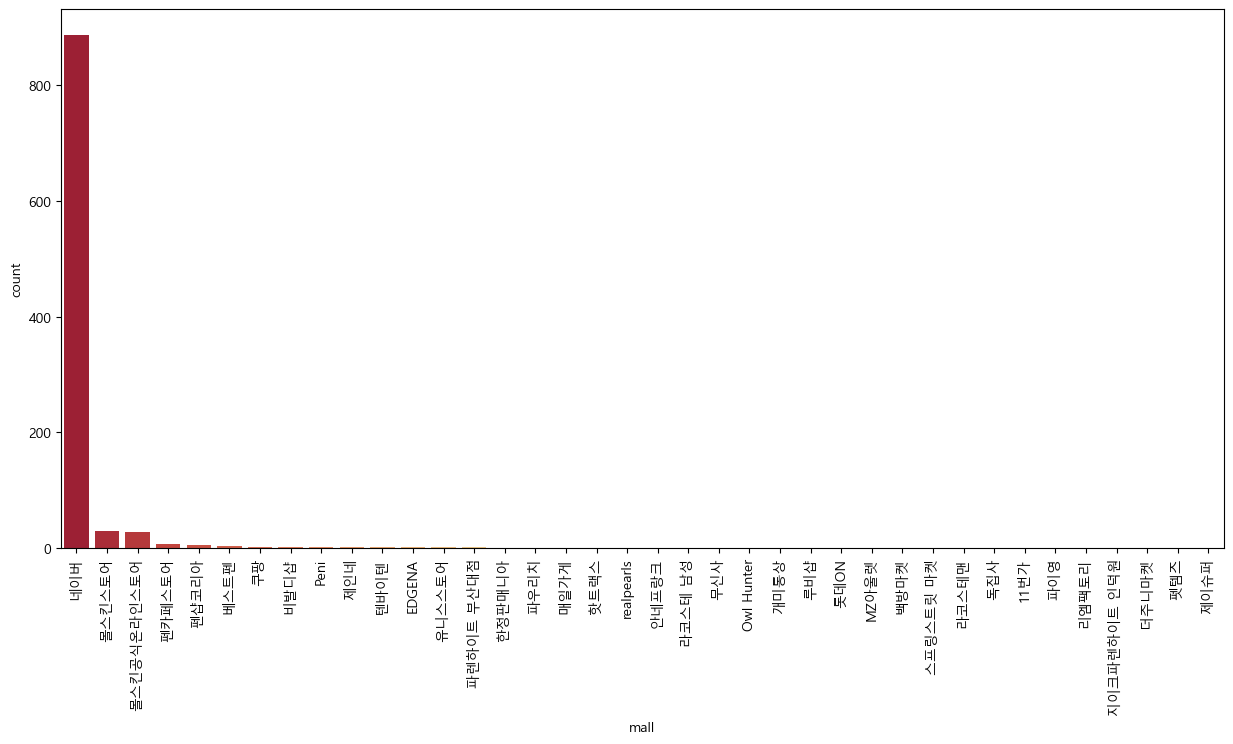

In [41]:
plt.figure(figsize=(15, 7))
sns.countplot(
	data=result_molskin,
	x=result_molskin["mall"],
	palette="RdYlGn",
	order=result_molskin["mall"].value_counts().index
)
plt.xticks(rotation=90)
plt.show()

C:\Users\happy\AppData\Local\Temp\ipykernel_25508\2802202080.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


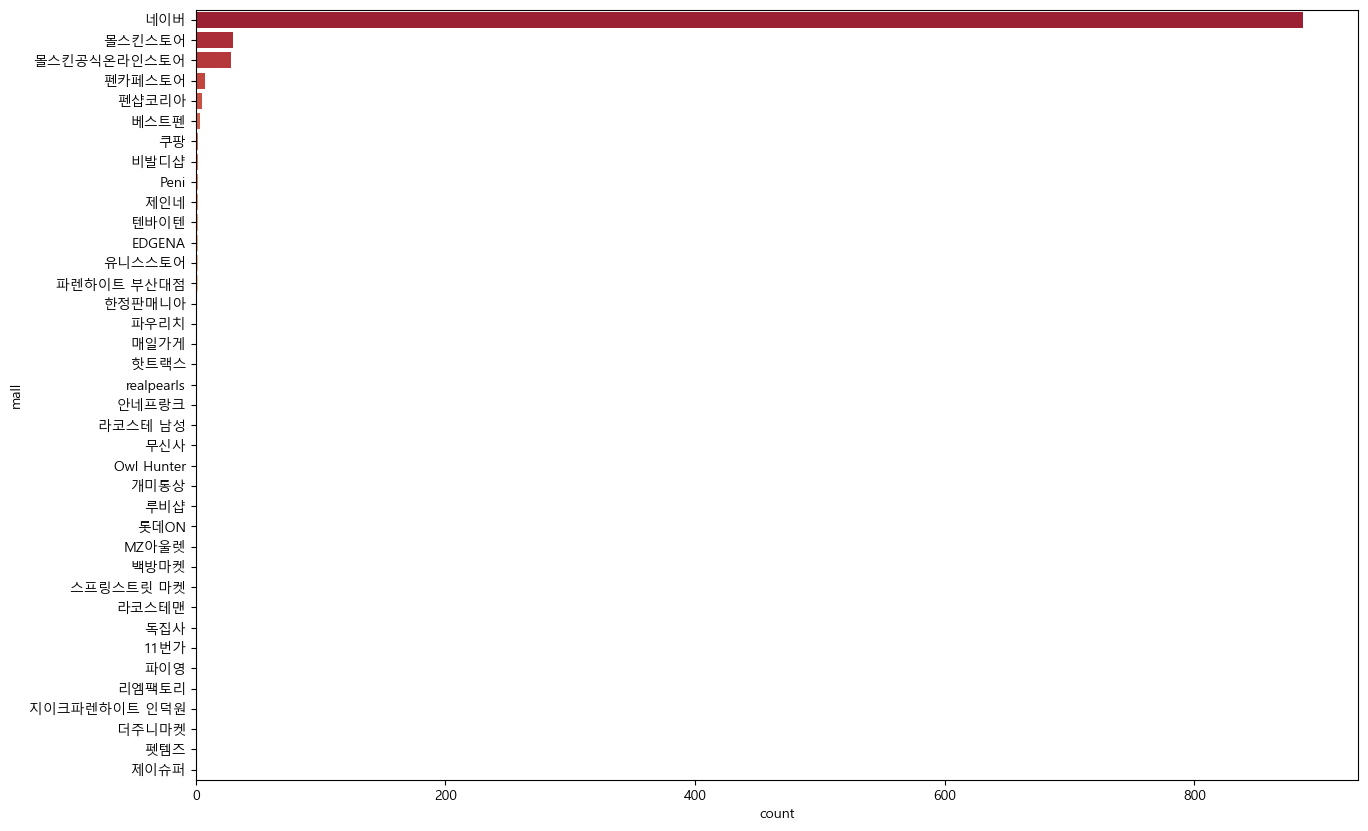

In [47]:
plt.figure(figsize=(15,10))
sns.countplot(
	data=result_molskin,
	y=result_molskin["mall"],
	palette="RdYlGn",
	order=result_molskin["mall"].value_counts().index
)
plt.show()